In [2]:
import torch

from svpg.utils.utils import load_algo_data
from svpg.visu.state_visitation import plot_state_visitation

import matplotlib.pyplot as plt
from omegaconf import OmegaConf

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [37]:
env_name = "MyCartPole-v0"
algo_names = ["A2C-independant", "A2C-SVPG", "A2C-SVPG_annealed"]
config = OmegaConf.create({
    "algorithm": {
        "seed": 4,
        "n_evals": 100,
    },
    "gym_env": {
        "classname": "svpg.agents.env.make_gym_env",
        "env_name": env_name
    }
})
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [38]:
def plot_algos_perf(directory, algo_names, env_name, device, ax=None):
    if not ax:
        for algo_name in algo_names:
            _, _, rewards, timesteps = load_algo_data(directory + algo_name, device)
            plt.plot(timesteps, rewards.mean(axis=0), linewidth=3, label=algo_name)
        plt.legend()
        plt.title(env_name)
        return

    for algo_name in algo_names:
        _, _, rewards, timesteps = load_algo_data(directory + algo_name, device)
        ax.plot(timesteps, rewards.mean(axis=0), linewidth=3, label=algo_name)
    ax.legend()
    ax.set_title(env_name)

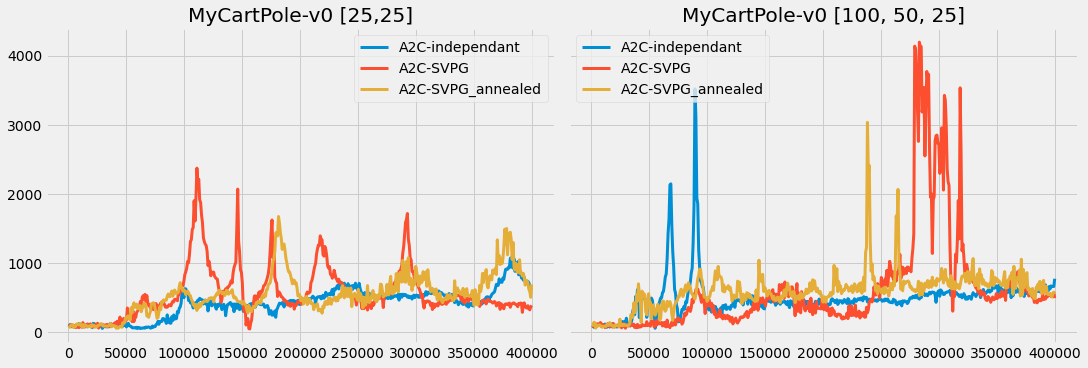

In [40]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
ax1, ax2 = fig.subplots(nrows=1, ncols=2, sharey=True)

plt.style.use("fivethirtyeight")
plot_algos_perf(
    f"../runs/{env_name}/22-05-08/14-23-23/",
    algo_names,
    env_name + " [25,25]",
    device,
    ax=ax1,
)

plot_algos_perf(
    f"../runs/{env_name}/22-05-08/14-53-14/",
    algo_names,
    env_name + " [100, 50, 25]",
    device,
    ax=ax2,
)


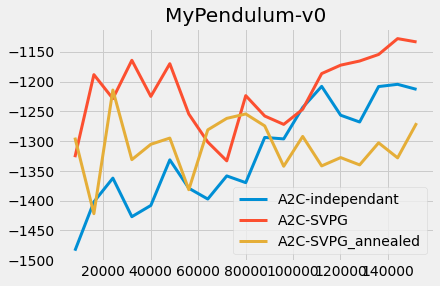

In [42]:
env_name = "MyPendulum-v0"
plot_algos_perf(f"../runs/{env_name}/22-05-07/21-29-40/", algo_names, env_name, device)

In [ ]:
plot_state_visitation(config, a2c_agents, a2c_rewards, "A2C", device=device, cmap="Blues", save=False)


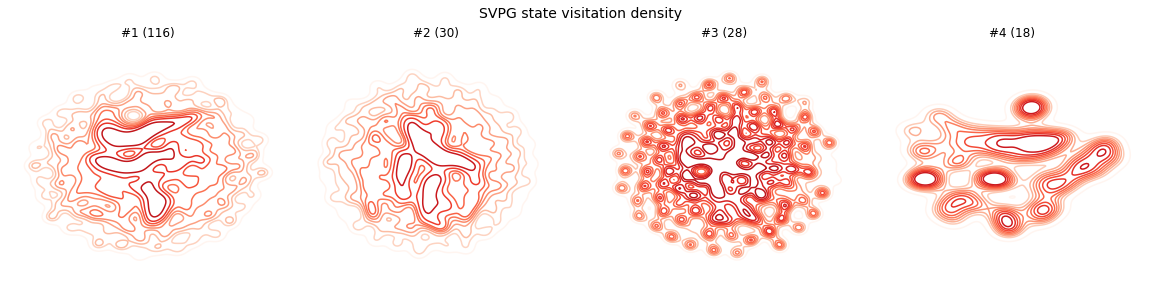

In [6]:
plot_state_visitation(config, svpg_agents, svpg_rewards, "SVPG", device=device, cmap="Reds", save=False)


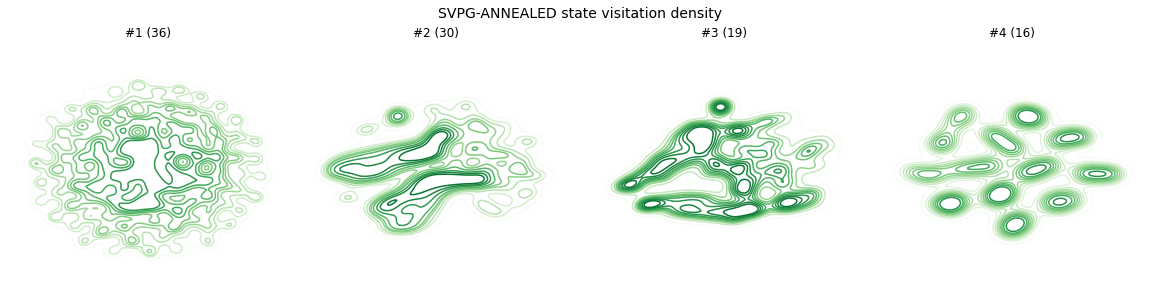

In [7]:
plot_state_visitation(config, svpga_agents, svpga_rewards, "SVPG-ANNEALED", device=device, cmap="Greens", save=False)
